<a href="https://colab.research.google.com/github/Rakshit-Sawarn-iitb/WIDS-Brain-Tumor-Detection/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST
Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise two layers, each with 10 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:


<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$
</div>




You have the flexibility to create any function within or outside the class, allowing you to modify parameters as needed

In [87]:
#importing libraries
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

### Required functions

In [88]:
# activation and loss functions
def ReLU(x):
  a = np.maximum(x,0)
  return a

def derivative_ReLU(x):
  b = np.array(x>0,dtype = np.float32)
  return b

def softmax(x):
  expx = np.exp(x)
  return expx/np.sum(expx, axis = 0,keepdims = True)


In [89]:
#complete the class of neural network

class NN:
  def __init__(self, lr = 0.001, n_iters = 100):
      self.lr = lr
      self.n_iters = n_iters
      self.w1 = (np.random.randn(10,784))
      self.b1 = np.zeros((10,1))
      self.w2 = (np.random.randn(10,10))
      self.b2 = np.zeros((10,1))
      self.a1 = None
      self.a2 = None

  def forward_propagation(self,x):
    z1 = np.dot(self.w1,x.T)+self.b1
    self.a1 = ReLU(z1)
    z2 = np.dot(self.w2,self.a1)+self.b2
    self.a2 = softmax(z2)

    return self.a2

  def one_hot(self, labels, num_classes): #return a 0 vector with 1 only in the position corresponding to the value in test target
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_classes, num_samples))

    for i in range(num_samples):
      one_hot_labels[labels[i], i] = 1

    return one_hot_labels

  def cost_function(self,a,y):
    m = (y.T).shape[0]
    cost = -(1/m) * np.sum(y * np.log(a))
    return cost

  def backward_propagation(self,x,y):
    w1 = self.w1
    w2 = self.w2
    b1 = self.b1
    b2 = self.b2
    a1 = self.a1
    a2 = self.a2

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*(np.dot(dz2,a1.T))
    db2 = (1/m)*(np.sum(dz2, axis=1, keepdims = True))
    dz1 = (1/m)*(np.dot(w2.T,dz2))*(derivative_ReLU(a1))
    dw1 = (1/m)*(np.dot(dz1,x))
    db1 = (1/m)*(np.sum(dz1, axis=1, keepdims = True))

    gradients = {
        'dz1':dz1,
        'dz2':dz2,
        'dw2':dw2,
        'db2':db2,
        'dw1':dw1,
        'db1':db1
    }

    return gradients

  def update_params(self, gradients):

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    self.w1 -= self.lr*(dw1)
    self.w2 -= self.lr*(dw2)
    self.b1 -= self.lr*(db1)
    self.b2 -= self.lr*(db2)

  def get_predictions(self):
    pass

  def get_accuracy(self,y):
    ypred_out = np.argmax(self.a2,0)
    yout = np.argmax(y,0)

    acc = np.mean(yout == ypred_out)*100

    return acc

  def gradient_descent(self, x, y):
    for i in range(self.n_iters):
      a2 = self.forward_propagation(x)
      gradient = self.backward_propagation(x,y)
      self.update_params(gradient)
      cost = self.cost_function(a2, y)
      if i % (self.n_iters/10) == 0:
        print(f"Iteration {i}, Cost: {cost}")

    return self.w1, self.b1, self.w2, self.b2

  def make_predictions(self,x):
    ypred = self.forward_propagation(x)
    predicted = np.argmax(ypred)
    return predicted

  def show_prediction(self,x): #show the prediction and actual output for an image in mnist dataset
    idx = random.randrange(0, x.shape[0])
    single_image = x[idx,: ].reshape((28, 28))
    plt.imshow(single_image, cmap='gray')
    plt.show()

    input_image = x[idx, :].reshape(x[idx, :].shape[0], 1)
    prediction = self.make_predictions(input_image.T)

    print("Model predicts:", prediction)


## main

In [90]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

###preprocessing the data


In [91]:
# all values of pixels should be in range[0,1]
X_train = (X_train.reshape(X_train.shape[0], -1)/ 255.0)
X_test = (X_test.reshape(X_test.shape[0], -1) / 255.0)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [104]:
nn = NN(lr = 0.001,n_iters=1000)
y_train_encoded = nn.one_hot(Y_train,10)
y_test_encoded = nn.one_hot(Y_test,10)

print(y_train_encoded.shape)

(10, 60000)


###Model Training

In [105]:
#training model using gradient descent
w1, b1, w2, b2 = nn.gradient_descent(X_train,y_train_encoded)

Iteration 0, Cost: 27.031202240570853
Iteration 100, Cost: 2.6051957875517755
Iteration 200, Cost: 1.924736652352089
Iteration 300, Cost: 1.8200997312679574
Iteration 400, Cost: 1.7800088643372571
Iteration 500, Cost: 1.7585492085300332
Iteration 600, Cost: 1.7424618021164682
Iteration 700, Cost: 1.7297525305087786
Iteration 800, Cost: 1.7204365454486845
Iteration 900, Cost: 1.714213338138064


In [106]:
nn.w1 = w1
nn.w2 = w2
nn.b1 = b1
nn.b2 = b2

In [107]:
ypred = nn.make_predictions(X_test)

acc = nn.get_accuracy(y_test_encoded)
print(acc)

40.1


### Viewing Results


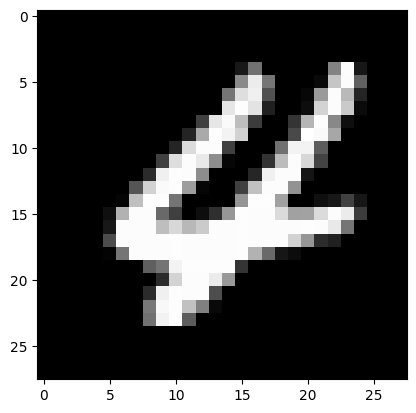

Model predicts: 9


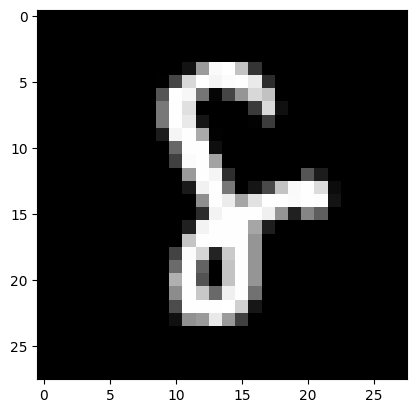

Model predicts: 8


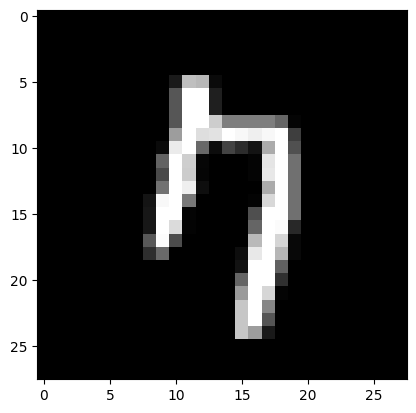

Model predicts: 7


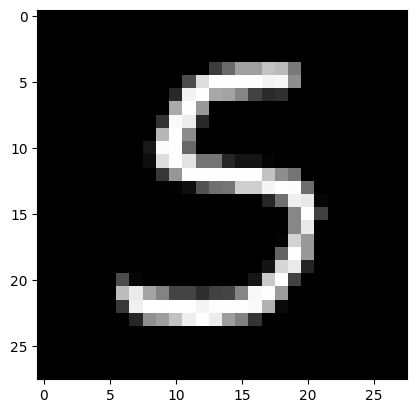

Model predicts: 5


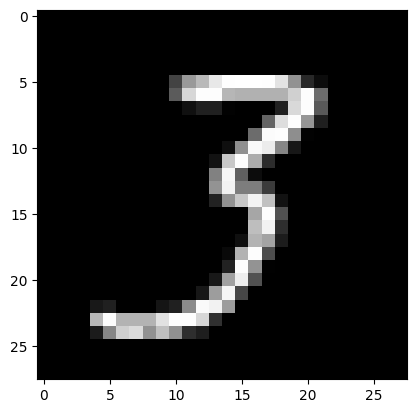

Model predicts: 3


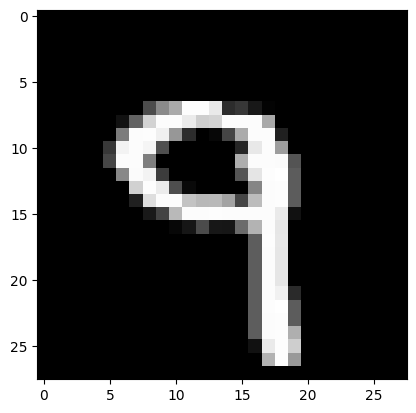

Model predicts: 4


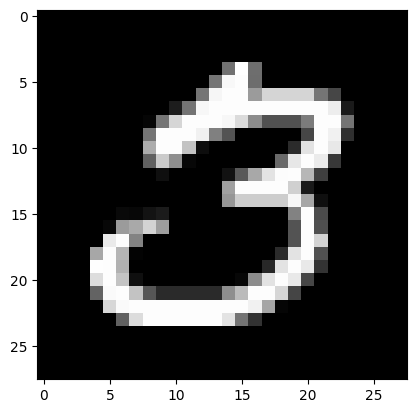

Model predicts: 8


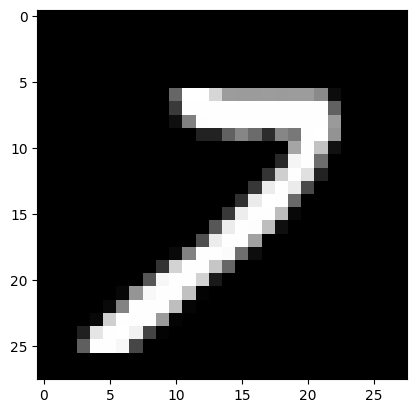

Model predicts: 8


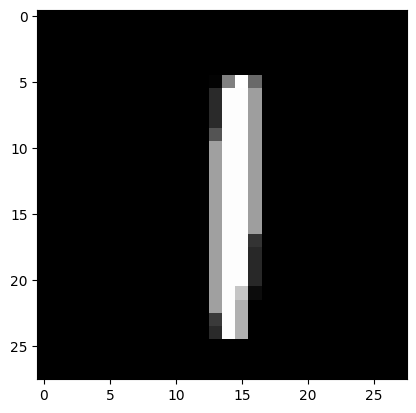

Model predicts: 1


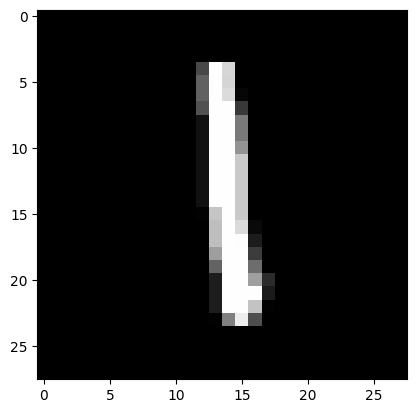

Model predicts: 1


In [108]:
#viewing prediction for 10 random images in dataset
for epoch in range(10) :
  nn.show_prediction(X_train)